In [1]:
# Source: https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

import pandas as pd
from pathlib import Path

In [2]:
data = {}
sentences = []
for filename in Path('data').rglob('*.txt'):
    with open(filename, 'r') as file:
        document = {}
        document['filename'] = str(filename)
        document['content'] = file.read().replace('\n', '')
        sentences = sentences + document['content'].split('.')
        document['wordcount'] = len(document['content'].split())
        data[str(filename)]=document
dataset = pd.DataFrame.from_dict(data,orient='index')

In [3]:
dataset.head()
sentences[0:5]

[' Good morning',
 " As some of you know, Senator Lugar and I recently traveled to Russia, Ukraine, and Azerbaijan to witness firsthand both the progress we're making in securing the world's most dangerous weapons, as well as the serious challenges that lie ahead",
 'Now, few people understand these challenges better than the co-founder of the Cooperative Threat Reduction Program, Dick Lugar, and this is something that became particularly clear to me during one incident on the trip',
 'We were in Ukraine, visiting a pathogen laboratory in Kiev',
 ' This is a city of two and a half million, and in a non-descript building right in the middle of town stood this facility that once operated on the fringes of the Soviet biological weapons program']

the     904
and     666
to      637
of      534
that    450
a       434
in      348
we      237
is      216
our     208
for     198
I       177
this    163
-       149
have    126
on      126
be      117
will    106
with    104
are     103
dtype: int64

In [5]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(dataset 
         ['content']).split()).value_counts()[-20:]
freq1

month,                1
concessions           1
stakes                1
causes.               1
Fortune               1
implemented           1
convey                1
cancer,               1
deferred.But          1
select                1
plagued               1
closed                1
save                  1
development.Third,    1
divide                1
McCain.But            1
letters               1
way.You               1
college;              1
spread                1
dtype: int64

In [6]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [7]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

In [8]:
corpus = []
for i in range(0, len(dataset)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['content'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [9]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))

In [10]:
wordcloud

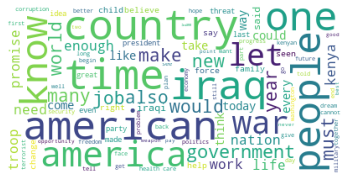

In [11]:
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

[Text(0, 0, 'american'),
 Text(0, 0, 'people'),
 Text(0, 0, 'country'),
 Text(0, 0, 'time'),
 Text(0, 0, 'iraq'),
 Text(0, 0, 'one'),
 Text(0, 0, 'know'),
 Text(0, 0, 'america'),
 Text(0, 0, 'year'),
 Text(0, 0, 'let'),
 Text(0, 0, 'government'),
 Text(0, 0, 'work'),
 Text(0, 0, 'war'),
 Text(0, 0, 'promise'),
 Text(0, 0, 'job'),
 Text(0, 0, 'need'),
 Text(0, 0, 'make'),
 Text(0, 0, 'threat'),
 Text(0, 0, 'many'),
 Text(0, 0, 'must')]

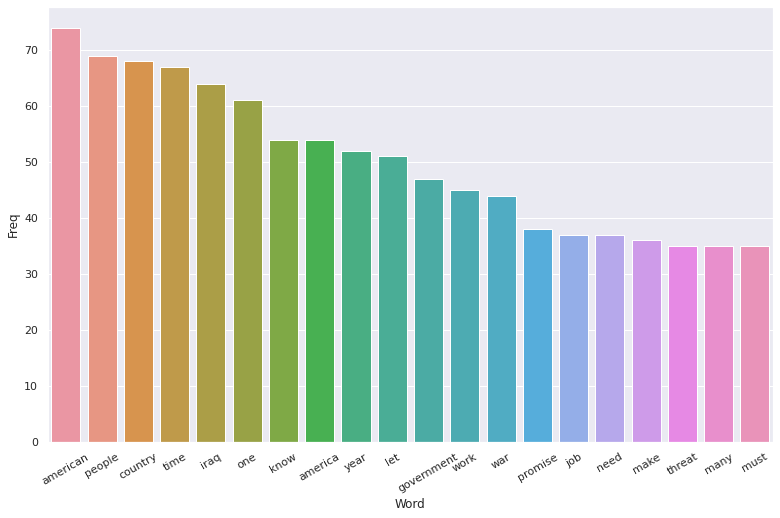

In [13]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [55]:
top_df

,Word,Freq
0,american,74
1,people,69
2,country,68
3,time,67
4,iraq,64
5,one,61
6,know,54
7,america,54
8,year,52
9,let,51


In [60]:
#top_df["Indexes"]= data["Name"].str.find(sub)

for index, row in top_df.iterrows():
    print(row['Word'], row['Freq']),

american 74
people 69
country 68
time 67
iraq 64
one 61
know 54
america 54
year 52
let 51
government 47
work 45
war 44
promise 38
job 37
need 37
make 36
threat 35
many 35
must 35
